# Στοχαστικές Ανελίξεις 
## 9η Εργαστηριακή Άσκηση

Όνομα: Μάριος Παπαχρήστου

email: papachristoumarios@gmail.com

AM: 03115101 


In [16]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2017)  # for reproducibility

%matplotlib inline

In [10]:
def sim_anneal(f, x_low, x_high,
               T=2.0, T_min=2**(-12), 
               cool_factor=0.9, cool_sch=100,
               delta = 1.0, shrink_factor=0.5, shrink_thres=0.25,
               trace = False):
    
    # Initialize
    x = np.random.uniform(x_low, x_high)
    f_cur = f(x)  # current value of f
    steps = accepted = 0
    if trace: path = []

    # Main loop
    while T > T_min:
        
        # proposed new position
        x_new = x + np.random.uniform(-delta, delta)
        if x_new > x_high or x_new < x_low:
            continue  # skip this proposal
        f_new = f(x_new)

        # accept/reject jump
        if np.log(np.random.rand()) < -(f_new - f_cur) / T :
            x, f_cur = x_new, f_new
            accepted += 1            
                
        # Cooling
        if steps == cool_sch:  # time for the next cooling
            T *= cool_factor  # cool down
            # Adjust Search Space
            if accepted / steps < shrink_thres:
                delta *= shrink_factor
            steps = accepted = 0
        
        if trace: path.append(x)
        steps += 1        
        
    
    if trace: return path
    return x

## Παραδοτέο 2

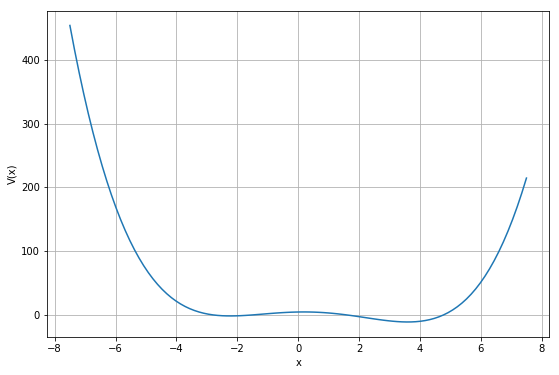

Point is  3.4999230228413416
Point is  -2.22866200805419
Point is  -2.229561267361756
Point is  3.499686307166997
Point is  3.4996792033856474
Point is  3.499673527473471
Point is  3.49940523730492
Point is  3.499918139680655
Point is  3.499977427593387
Point is  3.4999995285693113
Point is  3.49969720560145
Point is  3.4999117095623786
Point is  3.499847907530339
Point is  3.4997490705249206
Point is  3.499955062738144
Point is  3.4998561396727204
Point is  -2.223387832478807
Point is  -2.2282026703626805
Point is  -2.239764301440437
Point is  3.4997564817570535
Point is  -2.227933725746177
Point is  3.499908646920451
Point is  3.4999068799823005
Point is  3.4999201798570856
Point is  -2.2264209724753203
Point is  3.4996012680622464
Point is  3.4997072583544453
Point is  3.498820363721397
Point is  -2.2351920212042935
Point is  -2.227410262896506
Point is  3.4999346522908525
Point is  3.499965106205427
Point is  -2.2417961155247497
Point is  3.49995114586469
Point is  -2.2262928385950

In [11]:
def U(x):
    """Energy (objective) function to minimize"""
    return np.polyval((13/90, -0.3, -101/45, 13 / 15 , 4), x)

x = np.linspace(-7.5, 7.5, 100)

plt.figure(figsize = (9, 6))
plt.plot(x, U(x))
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid(True)
plt.show()

# Parameters
T_start, T_end = 1, 2**(-12)
cool_sch, cool_factor = 100, 0.99
paths = []
Nhits = 0
for i in range(200):
    path = sim_anneal(U, -3.5, 3.5, delta = 1.,
                      T = T_start, T_min = T_end,
                      cool_factor = cool_factor, 
                      cool_sch = cool_sch,
                      trace = True)  # keep the default for the rest
    paths.append(path)
    for x0 in [-2.22926, 3.6005]:
        x = path[-1]    
        rel = abs(x0 - x) / abs(x0)
        if rel <= 0.05:
            Nhits += 1 
    print('Point is ', path[-1])

print('Percentage is ', Nhits / 200)

In [13]:
cool = {}
cf = [0.25, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
# Parameters
T_start, T_end = 1, 2**(-12)

for cool_factor in cf:
    cool_sch = 100
    paths = []
    Nhits = 0
    for i in range(200):
        path = sim_anneal(U, -3.5, 3.5, delta = 1.,
                          T = T_start, T_min = T_end,
                          cool_factor = cool_factor, 
                          cool_sch = cool_sch,
                          trace = True)  # keep the default for the rest
        paths.append(path)
        for x0 in [-2.22926, 3.6005]:
            x = path[-1]    
            rel = abs(x0 - x) / abs(x0)
            if rel <= 0.05:
                Nhits += 1 
    p = Nhits / 200;
    cool[cool_factor] = p
    
print(cool)     

{0.25: 1.0, 0.5: 1.0, 0.99: 1.0, 0.95: 1.0, 0.8: 1.0, 0.7: 1.0, 0.9: 1.0, 0.6: 1.0}


Text(0.5,0,'Cool factor')

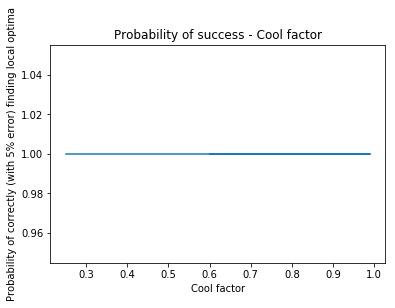

In [14]:
# plot cool factor 
plt.figure();
plt.plot(cool.keys(), cool.values())
plt.title('Probability of success - Cool factor')
plt.ylabel('Probability of correctly (with 5% error) finding local optima')
plt.xlabel('Cool factor')

A) Παραγωγίζοντας την $V(x)$ έχουμε δύο υποψήφια τοπικά ελάχιστα στις θέσεις $x = -2.22926, x = 3.6005$. Το ποσοστό ορθής εύρεσης είναι 100% 

B) Από το γράφημα Probability - Cool Factor φαίνεται ότι η πιθανότητα εύρεσης τ.ε. παραμένει σταθερή 

In [19]:
import csv
import urllib.request

url = "http://math.ntua.gr/~loulakis/info/python_codes_files/eu.csv"
with urllib.request.urlopen(url) as urlstream:
    csvfile = csv.reader(urlstream.read().decode('utf-8').splitlines(), delimiter=",")
    city_coord = {city: tuple(map(float, (longitude, latitude))) 
                  for longitude, latitude, city, _ in csvfile}

Ncities = len(city_coord)  # number of cities
city_names = list(city_coord.keys())
city_coord["Athens"]

(37.97918, 23.716647)

In [20]:
def geodesic_dist(city1, city2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    if city1 == city2:
        return 0.
    lon1, lat1 = np.deg2rad(city1)
    lon2, lat2 = np.deg2rad(city2)
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers 6371. Use 3956 for miles
    return c * r

In [21]:
# Distance between every pair of cities
dist = np.array([
    [geodesic_dist(coord1, coord2) for coord2 in city_coord.values()]
    for coord1 in city_coord.values()
])

In [23]:
def total_dist(cities):
    """The total distance covered by the salesman"""
    total = sum(dist[city1][city2] for city1, city2 in zip(cities[:-1], cities[1:]))
    total += dist[cities[-1]][cities[0]] # return to start
    return total

In [24]:
def dist_diff(ABC, XYZ, tour):
    """
    Differnce of total distance traveled if we swap cities B, Y.
    Input: 2 triplets of nodes A, B, C and X, Y, Z.
    """
    # order
    A, B, C = ABC
    X, Y, Z = XYZ
    # cities
    a, b, c = tour[ABC]
    x, y, z = tour[XYZ]
    
    BpY = (B - Y) % len(tour) # to understand the order
    dx = 0
    
    if BpY != -1 % len(tour):  #  B is not X
        dx += dist[x, b] - dist[x, y] + dist[y, c] - dist[b, c]
    if BpY != 1:  # Y is not A
        dx += dist[a, y] - dist[a, b] + dist[b, z] - dist[y, z]

    return dx

In [36]:
# Annealing Parameters
Temp = 10 ** 7
Temp_end = 0.01
cool_factor = 0.9
cool_schedule = 100

# Bookeeping parameters
tour = np.arange(Ncities)  # initial permutation
tour_length = total_dist(tour)  # initial energy level

shortest_tour = np.copy(tour)  # optimal permutation (to be updated)
shortest_tour_length = tour_length  # shortest distance

# To plot later
first_guess = tour_length
running_lengths = []
optimal_lengths = []

# Main loop
while Temp > Temp_end:
    # Constant Temperature Era
    for step in range(cool_schedule):
        # Choose 2 cities to swap
        B, Y = np.random.choice(Ncities, size=2, replace=False)  # index of cities to swap
        ABC = np.array([B-1, B, B+1]) % Ncities  # neighbors of B
        XYZ = np.array([Y-1, Y, Y+1]) % Ncities  # neighbors of Y

        # Compute the energy diffence  
        diff = dist_diff(ABC, XYZ, tour)
        
        # Decide whether to change state.
        if np.log(np.random.rand()) < -diff / Temp:
            tour[B], tour[Y] = tour[Y], tour[B]
            tour_length += diff
            # Keep track of the optimal tour observed
            if tour_length < shortest_tour_length:
                shortest_tour = np.copy(tour)
                shortest_tour_length = tour_length

        running_lengths.append(tour_length)
        optimal_lengths.append(shortest_tour_length)

    Temp *= cool_factor  # cool down

print('Improvement:\t%8.0f%%'  % (100 * (first_guess - shortest_tour_length) / first_guess))
print('Initial distance:\t%.0f km'  % first_guess)
print('Optimal distance:\t%.0f km'  % shortest_tour_length)

Improvement:	      56%
Initial distance:	50078 km
Optimal distance:	22034 km


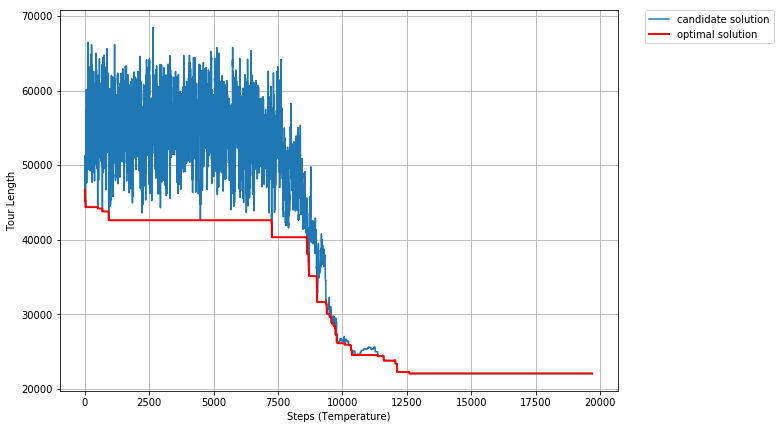

In [37]:
running_lengths = np.array(running_lengths)
optimal_lengths = np.array(optimal_lengths)

plt.figure(figsize = (10, 7))
plt.plot(np.arange(len(running_lengths)), running_lengths, label="candidate solution")
plt.plot(np.arange(len(optimal_lengths)), optimal_lengths, 'r-', linewidth=2, label="optimal solution")

plt.xlabel("Steps (Temperature)")
plt.ylabel("Tour Length")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

plt.show()

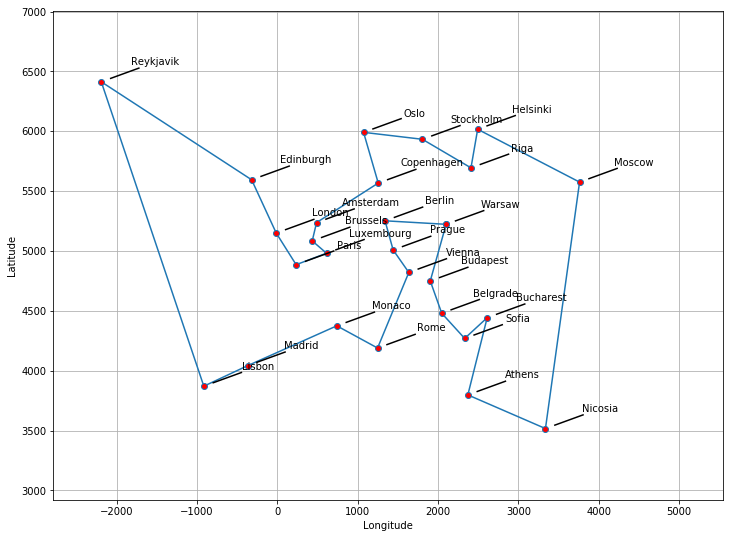

In [38]:
plt.figure(figsize=(12, 9))  # increase image size

# Get Tour Coordinates
coord = np.array([city_coord[city] for city in city_names])
cities = shortest_tour.copy()
cities = np.append(cities, cities[0])
coord = coord[cities,:]  # rearrange

# Scale for better readability
scale_factor = 100
coord = coord * scale_factor

# Plot Tour
plt.plot(coord[:, 1], coord[:,0], 'o-', mfc='r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()

# Manage spacing
spacing = np.fabs(min(coord[:,1]) - max(coord[:,1])) * .1
plt.xlim(min(coord[:,1]) - spacing, max(coord[:,1]) + spacing * 3)
plt.ylim(min(coord[:,0]) - spacing, max(coord[:,0]) + spacing)

# Add labels - remove for more clear picture
if len(cities)<=30:
    for i, city in enumerate(cities[:-1]):
        plt.text(coord[i,1], coord[i,0],
                 '%s' % city_names[city],
                 withdash = True,
                 dashdirection = 1,
                 dashlength = 30,
                 rotation = 0,
                 dashrotation = 20,
                 dashpush = 10)
plt.show()

## Παραδοτέο

Σε συνέχεια του προηγούμενο notebook:

Α) Παρατηρούμε (παραπάνω) ότι με αύξηση του cooling factor βελτιώθηκε η λύση μας 

B) Τα αποτελέσματα φαίνονται παρακάτω

Γ) Σε ένα κελί κειμένου, απαντήστε στις παρακάτω ερωτήσεις:

1. Βάσει συνδυαστικής αυτό αντιστοιχεί σε όλα τα μονοπάτια του $K_{35}$ τα οποία είναι οι μεταθέσεις των 35 πόλεων δηλαδή $35!$

2. Χρησιμοποιώντας brute-force αλγόριθμο με πολυπλοκότητα $O(n!)$ θα θέλαμε περίπου $10^{33}$ δευτερόλεπτα

In [39]:
url = "http://math.ntua.gr/~loulakis/info/python_codes_files/europe.csv"
with urllib.request.urlopen(url) as urlstream:
    csvfile = csv.reader(urlstream.read().decode('utf-8').splitlines(), delimiter=",")
    city_coord = {city: tuple(map(float, (longitude, latitude))) 
                  for longitude, latitude, city, _ in csvfile}

Ncities = len(city_coord)  # number of cities
city_names = list(city_coord.keys())

# Distance between every pair of cities
dist = np.array([
    [geodesic_dist(coord1, coord2) for coord2 in city_coord.values()]
    for coord1 in city_coord.values()
])

# Annealing Parameters
Temp = 10 ** 7
Temp_end = 0.01
cool_factor = 0.9
cool_schedule = 100

# Bookeeping parameters
tour = np.arange(Ncities)  # initial permutation
tour_length = total_dist(tour)  # initial energy level

shortest_tour = np.copy(tour)  # optimal permutation (to be updated)
shortest_tour_length = tour_length  # shortest distance

# To plot later
first_guess = tour_length
running_lengths = []
optimal_lengths = []

# Main loop
while Temp > Temp_end:
    # Constant Temperature Era
    for step in range(cool_schedule):
        # Choose 2 cities to swap
        B, Y = np.random.choice(Ncities, size=2, replace=False)  # index of cities to swap
        ABC = np.array([B-1, B, B+1]) % Ncities  # neighbors of B
        XYZ = np.array([Y-1, Y, Y+1]) % Ncities  # neighbors of Y

        # Compute the energy diffence  
        diff = dist_diff(ABC, XYZ, tour)
        
        # Decide whether to change state.
        if np.log(np.random.rand()) < -diff / Temp:
            tour[B], tour[Y] = tour[Y], tour[B]
            tour_length += diff
            # Keep track of the optimal tour observed
            if tour_length < shortest_tour_length:
                shortest_tour = np.copy(tour)
                shortest_tour_length = tour_length

        running_lengths.append(tour_length)
        optimal_lengths.append(shortest_tour_length)

    Temp *= cool_factor  # cool down

print('Improvement:\t%8.0f%%'  % (100 * (first_guess - shortest_tour_length) / first_guess))
print('Initial distance:\t%.0f km'  % first_guess)
print('Optimal distance:\t%.0f km'  % shortest_tour_length)

Improvement:	      64%
Initial distance:	91266 km
Optimal distance:	32640 km


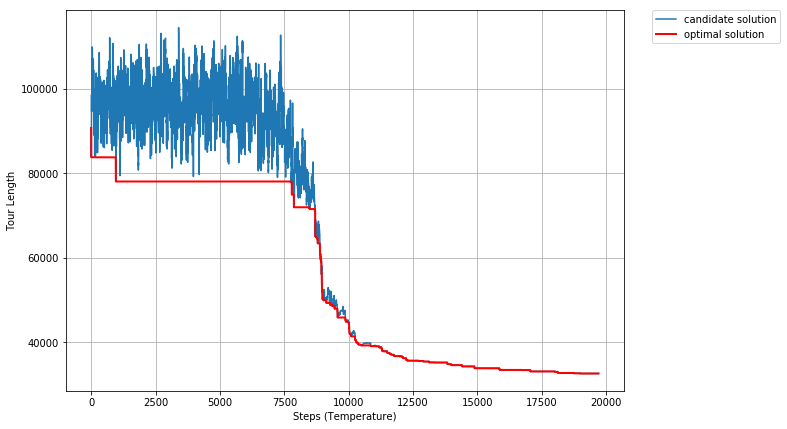

In [47]:
running_lengths = np.array(running_lengths)
optimal_lengths = np.array(optimal_lengths)

plt.figure(figsize = (10, 7))
plt.plot(np.arange(len(running_lengths)), running_lengths, label="candidate solution")
plt.plot(np.arange(len(optimal_lengths)), optimal_lengths, 'r-', linewidth=2, label="optimal solution")

plt.xlabel("Steps (Temperature)")
plt.ylabel("Tour Length")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

# Get Tour Coordinates
coord = np.array([city_coord[city] for city in city_names])
cities = shortest_tour.copy()
cities = np.append(cities, cities[0])
coord = coord[cities,:]  # rearrange

# Scale for better readability
scale_factor = 100
coord = coord * scale_factor


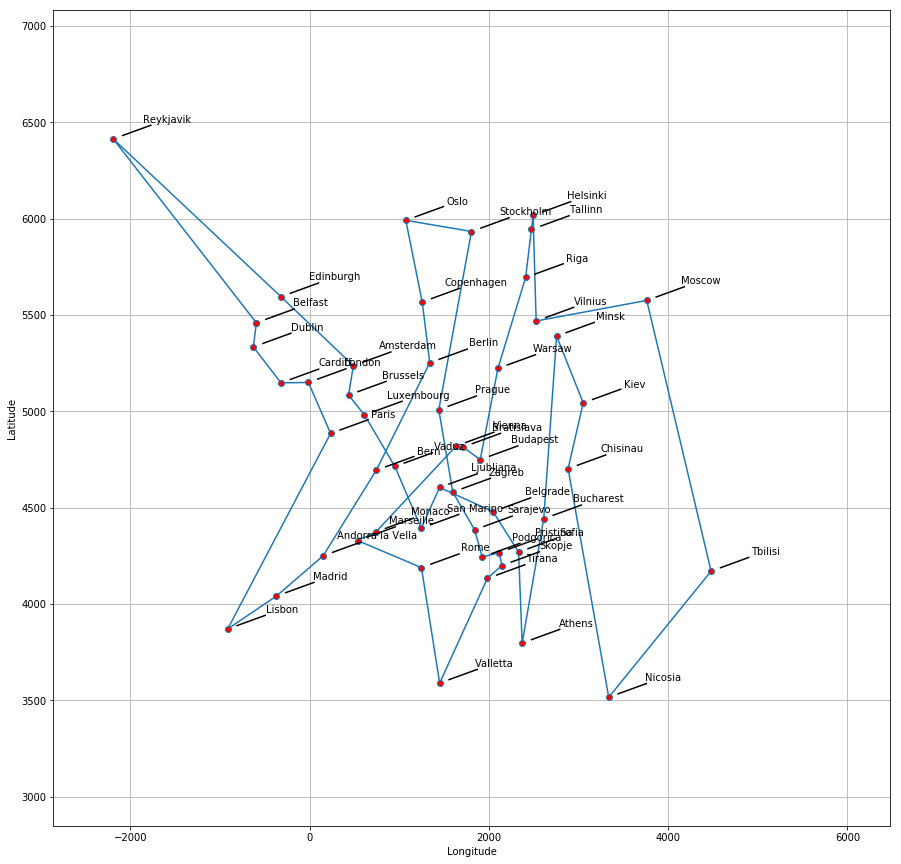

In [54]:
plt.figure(figsize = (15, 15))

# Plot Tour
plt.plot(coord[:, 1], coord[:,0], 'o-', mfc='r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()

# Manage spacing
spacing = np.fabs(min(coord[:,1]) - max(coord[:,1])) * .1
plt.xlim(min(coord[:,1]) - spacing, max(coord[:,1]) + spacing * 3)
plt.ylim(min(coord[:,0]) - spacing, max(coord[:,0]) + spacing)

for i, city in enumerate(cities[:-1]):
    plt.text(coord[i,1], coord[i,0],
             '%s' % city_names[city],
             withdash = True,
             dashdirection = 1,
             dashlength = 30,
             rotation = 0,
             dashrotation = 20,
             dashpush = 10)

# Αναφορές

[1] Λουλάκης Μ., Στοχαστικές Ανελίξεις, Αποθετήριο Κάλλιπος

[2] Papoulis, Athanasios, and S. Unnikrishna Pillai. Probability, random variables, and stochastic processes. Tata McGraw-Hill Education, 2002.